In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import pandas as pd
sns.set()

def corr_data(N, L):
    '''Generate random correlated data containing 2^N data points.
    Randon data is convolved over a 2^L/10 length to give the correlated signal.'''
    return np.convolve(numpy.random.randn(2**N), numpy.ones(2**L)/10, 'same')
rand_data = corr_data(16, 6)

In [22]:
with open('./data/slurm/unbiased5_slurm.out') as f:
    txt = f.read()
len(txt)
txt[3]

'='

In [ ]:
# marker = 'Per MPI rank memory allocation (min/avg/max) ='
# txt1, txt2 = txt.split(marker)

# df1 = pd.read_csv(StringIO(txt1), header=None, sep='|')
# df2 = pd.read_csv(StringIO(txt2), header=None, sep='\s+', engine='python')

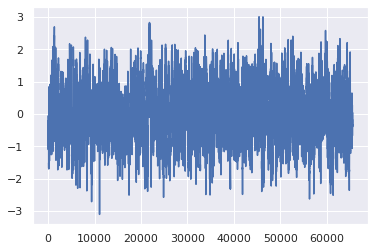

In [8]:
plt.plot(rand_data);


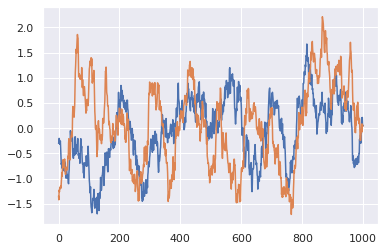

In [9]:
plt.plot(rand_data[:1000]);
plt.plot(rand_data[40000:41000]);

In [11]:
import pyblock
reblock_data = pyblock.blocking.reblock(rand_data)
for reblock_iter in reblock_data:
    print(reblock_iter)

BlockTuple(block=0, ndata=65536, mean=array(0.02839578), cov=array(0.66233753), std_err=array(0.00317907), std_err_err=array(8.78108268e-06))
BlockTuple(block=1, ndata=32768, mean=array(0.02839578), cov=array(0.65734182), std_err=array(0.00447889), std_err_err=array(1.74959418e-05))
BlockTuple(block=2, ndata=16384, mean=array(0.02839578), cov=array(0.6499808), std_err=array(0.00629855), std_err_err=array(3.47959405e-05))
BlockTuple(block=3, ndata=8192, mean=array(0.02839578), cov=array(0.63641307), std_err=array(0.00881403), std_err_err=array(6.88638205e-05))
BlockTuple(block=4, ndata=4096, mean=array(0.02839578), cov=array(0.60992492), std_err=array(0.01220276), std_err_err=array(0.00013484))
BlockTuple(block=5, ndata=2048, mean=array(0.02839578), cov=array(0.55862503), std_err=array(0.01651563), std_err_err=array(0.00025812))
BlockTuple(block=6, ndata=1024, mean=array(0.02839578), cov=array(0.44893855), std_err=array(0.0209384), std_err_err=array(0.0004629))
BlockTuple(block=7, ndata

In [12]:
opt = pyblock.blocking.find_optimal_block(len(rand_data), reblock_data)
print(opt)
print(reblock_data[opt[0]])

[10]
BlockTuple(block=10, ndata=64, mean=array(0.02839578), cov=array(0.04728248), std_err=array(0.02718067), std_err_err=array(0.00242145))
